In [1]:
import json

with open("../validation_results.json", "r") as f:
    data = json.load(f)

In [2]:
import pandas as pd
all_data = []
for chain in data.keys():
    
    for row in data[chain]["validation_results"]:
        all_data.append({
            "chain": chain,
            "file": row["file"],
            **row["validation"]
        })

df = pd.DataFrame(all_data)
df.head()
       

,chain,file,num_of_rows,api_call_status,error
0,YAYNO_BITAN,Price7290725900003-2560-202503211500.xml,0.0,success,NaN
1,YAYNO_BITAN,Price7290725900003-3010-202503211500.xml,0.0,success,NaN
2,YAYNO_BITAN,Price7290725900003-9032-202503211500.xml,0.0,success,NaN
3,YAYNO_BITAN,Price7290725900003-0077-202503211500.xml,41.0,success,NaN
4,YAYNO_BITAN,Price7290725900003-0014-202503211500.xml,0.0,success,NaN


In [4]:
df.error.value_counts()

error
Failed to fetch content for MEGA/PriceFull7290055700007-7999-202503211656.xml: 500    1
Failed to fetch files for chain NETIV_HASED: 500                                      1
Name: count, dtype: int64

In [5]:
# ! pip install seaborn

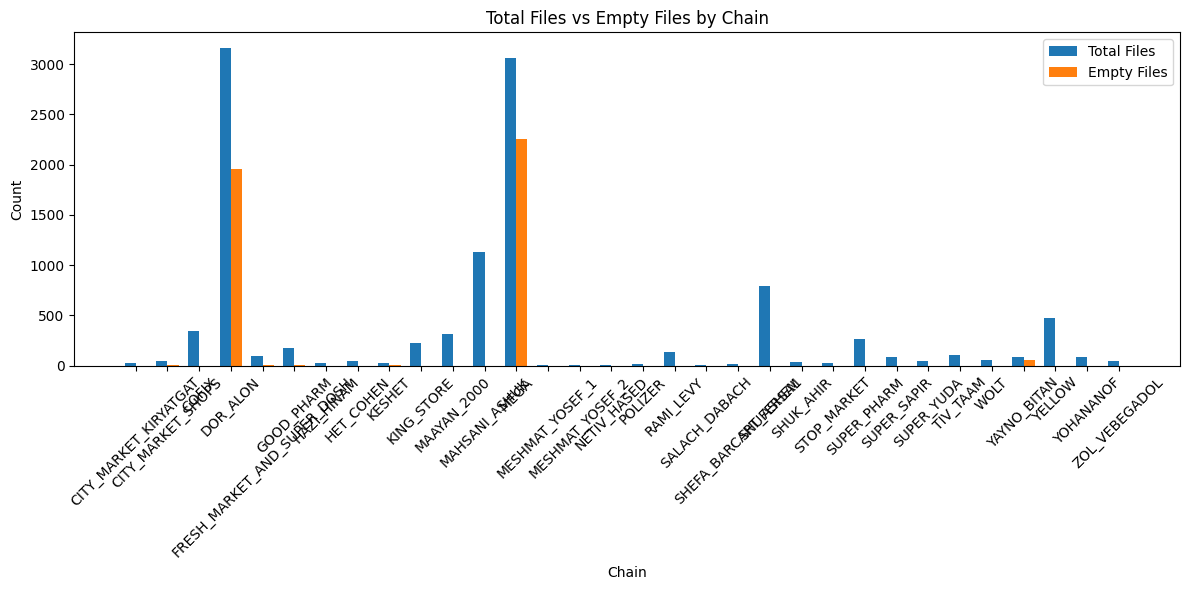

In [6]:

grouped_data = df.groupby("chain")["num_of_rows"].agg(
    total_files=lambda x: len(x),
    empty_files=lambda x: (x == 0.0).sum()
).reset_index()

# Plot using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x = range(len(grouped_data))
width = 0.35

plt.bar(x, grouped_data["total_files"], width, label="Total Files")
plt.bar([i + width for i in x], grouped_data["empty_files"], width, label="Empty Files")

plt.xlabel("Chain")
plt.ylabel("Count")
plt.title("Total Files vs Empty Files by Chain")
plt.xticks([i + width/2 for i in x], grouped_data["chain"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
from il_supermarket_scarper import FileTypesFilters
import ipywidgets as widgets

df['file_type'] = df.file.apply(lambda x: FileTypesFilters.get_type_from_file(x))
df['file_type'] = df['file_type'].apply(lambda x: x.name if x else 'unknown')

from IPython.display import display, clear_output

# Create chain_file_type column and split it for filtering
df['chain_file_type'] = df['chain'] + '@' + df['file_type']
df['file_type'] = df['chain_file_type'].str.split('@').str[1]

# Create dropdown widgets
chain_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['chain'].unique().tolist()),
    description='Chain:'
)

file_type_dropdown = widgets.Dropdown(
    options=['All'] + sorted(df['file_type'].unique().tolist()),
    description='File Type:'
)

def update_graph(chain, file_type):
    filtered_df = df.copy()
    
    if chain != 'All':
        filtered_df = filtered_df[filtered_df['chain'] == chain]
    if file_type != 'All':
        filtered_df = filtered_df[filtered_df['file_type'] == file_type]
    
    grouped_data = filtered_df.groupby("chain_file_type")["num_of_rows"].agg(
        total_files=lambda x: len(x),
        empty_files=lambda x: (x == 0.0).sum()
    ).reset_index()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    x = range(len(grouped_data))
    width = 0.35

    # Create the bars and store them in variables
    total_bars = ax.bar(x, grouped_data["total_files"], width, label="Total Files")
    empty_bars = ax.bar([i + width for i in x], grouped_data["empty_files"], width, label="Empty Files")

    # Add hover annotations
    def hover(event):
        if event.inaxes == ax:
            for i, (total_bar, empty_bar) in enumerate(zip(total_bars, empty_bars)):
                # Check if mouse is over total files bar
                if total_bar.contains(event)[0]:
                    total_bar.set_alpha(0.7)
                    ax.annotate(f'Chain: {grouped_data["chain_file_type"][i]}\nTotal Files: {grouped_data["total_files"][i]}',
                              xy=(i, grouped_data["total_files"][i]),
                              xytext=(10, 10), textcoords='offset points',
                              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                              arrowprops=dict(arrowstyle='->'))
                else:
                    total_bar.set_alpha(1.0)
                
                # Check if mouse is over empty files bar
                if empty_bar.contains(event)[0]:
                    empty_bar.set_alpha(0.7)
                    ax.annotate(f'Chain: {grouped_data["chain_file_type"][i]}\nEmpty Files: {grouped_data["empty_files"][i]}',
                              xy=(i + width, grouped_data["empty_files"][i]),
                              xytext=(10, 10), textcoords='offset points',
                              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                              arrowprops=dict(arrowstyle='->'))
                else:
                    empty_bar.set_alpha(1.0)
            plt.draw()

    fig.canvas.mpl_connect('motion_notify_event', hover)

    plt.xlabel("Chain")
    plt.ylabel("Count")
    plt.title("Total Files vs Empty Files by Chain")
    plt.xticks([i + width/2 for i in x], grouped_data["chain_file_type"], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
# Create interactive widget
interactive_plot = widgets.interactive(
    update_graph,
    chain=chain_dropdown,
    file_type=file_type_dropdown
)

display(interactive_plot)

interactive(children=(Dropdown(description='Chain:', options=('All', 'CITY_MARKET_KIRYATGAT', 'CITY_MARKET_SHO…

,chain,file,num_of_rows,api_call_status,error,file_type,chain_file_type
8666,NETIV_HASED,chain_error,NaN,error,Failed to fetch files for chain NETIV_HASED: 500,unknown,NETIV_HASED@unknown


In [6]:
# data
import pymongo


client = pymongo.MongoClient("mongodb://192.168.1.129:27017/")
db = client["supermarket_data"]


In [11]:
db["ScraperStatus"].find_one(
    {"results.file_name": {"$regex": "Price7290725900003-9032-202503211500"}},
    {"results.$": 1}  # This projection returns only the matched element in the array
)

In [40]:
! pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.0 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 43.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
